### Importing Library

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

%matplotlib inline

### Loading 2014, 2015, 2016

In [3]:
df_2014 = pd.read_csv("2014_Declined.csv")
df_2015 = pd.read_csv("2015_Declined.csv")
df_2016 = pd.read_csv("2016_Declined.csv")
df_2017 = pd.read_csv("Decline_2017_Wells.csv")

In [4]:
final = df_2014

### Considering Action Type = 1, 2, 3, 6, 7
#### Approved : Action Type 1,2,6
#### Declined : Action Type : 3, 7

In [5]:
df = df_2017
df_2017 = df = df[(df["Action_Type"] == 1) | (df["Action_Type"] == 2) | (df["Action_Type"] == 3)| (df["Action_Type"] == 6)|(df["Action_Type"] == 7)]



In [6]:
final = final.append(df_2015)
final = final.append(df_2016)
final = final.append(df_2017)

In [7]:
final.shape

(368855, 28)

In [8]:
final.columns

Index(['Action_Type', 'Agency_Code', 'AmorTer', 'AmorTerm', 'Amount',
       'Application_Date_Indicator', 'BoCreditScor', 'County_Code',
       'Denial_Reason_1', 'GDP', 'IncRat', 'Income', 'LTV', 'Loan_Purpose',
       'Loan_Type', 'Occupancy', 'PMT', 'Property_Location', 'Property_Type',
       'Purchaser_Type ', 'Rate', 'Real_State_Growth_%', 'Respondent_ID',
       'State_Code', 'USPS_Code', 'Unemployemnt', 'Unnamed: 0', 'Year'],
      dtype='object')

### All data is appended in Final Dataframe

In [9]:
interested = ['Agency_Code', 'Loan_Type','Property_Type', 'Loan_Purpose', 'Occupancy', 'Amount', 'Action_Type','State_Code', 'County_Code', 'Income', 'Purchaser_Type ','Property_Location', 'USPS_Code', 'GDP', 'Real_State_Growth_%', 'Rate','PMT', 'IncRat', 'Unemployemnt', 'AmorTerm', 'BoCreditScor', 'LTV', 'Year']
data = final[interested]


### Categorical data is hot one encoding
### Continous data is Normalising 

In [10]:
cat = ['Agency_Code', 'Loan_Type', 'Property_Type', 'Loan_Purpose','Occupancy','USPS_Code' , 'County_Code','BoCreditScor', 'LTV' ]

no_cat = ['Amount', 'Income', 'GDP', 'Real_State_Growth_%', 'Rate', 'PMT', 'IncRat', 'Unemployemnt']

In [11]:
pre = pd.get_dummies(data, columns=cat, drop_first=True)

In [12]:
pre.shape

(368855, 390)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = pd.DataFrame(data = pre)
scale[no_cat] = scaler.fit_transform(pre[no_cat])

# Show an example of a record with scaling applied
display(scale.head())

,Amount,Action_Type,State_Code,Income,Purchaser_Type,Property_Location,GDP,Real_State_Growth_%,Rate,PMT,...,County_Code_770,County_Code_775,County_Code_790,County_Code_800,County_Code_810,County_Code_820,County_Code_830,County_Code_840,BoCreditScor_4,LTV_1.0
0,0.00051,3,39,0.008502,0,Ohio,0.209551,0.666667,1.0,0.000544,...,0,0,0,0,0,0,0,0,1,0
1,0.00454,2,48,0.052110,0,Texas,0.590777,0.739130,1.0,0.004834,...,0,0,0,0,0,0,0,0,1,0
2,0.00289,1,4,0.010602,6,Arizona,0.093722,0.601449,1.0,0.003077,...,0,0,0,0,0,0,0,0,1,0
3,0.00113,6,16,0.008502,3,Idaho,0.012638,0.644928,1.0,0.001204,...,0,0,0,0,0,0,0,0,1,0
4,0.00047,3,39,0.005501,0,Ohio,0.209551,0.666667,1.0,0.000501,...,0,0,0,0,0,0,0,0,0,0


In [14]:
final = scale

In [15]:
scale["Action_Type"].value_counts()

3    157887
1    115358
6     48000
2     47508
7       102
Name: Action_Type, dtype: int64

In [16]:
y = []
a = 0
d = 0
for i in final["Action_Type"]:
    if i ==1 or i ==2 or i ==6:
        a +=1
        y.append(1)
        
    elif i ==3 or i==7:
        d +=1
        y.append(0)

In [17]:
del final["Action_Type"]

In [18]:
del final['Property_Location']

In [19]:
final.shape

(368855, 388)

# Analysis Number : 1

### Train Data  = 2014, 2015, 2016 (288000 Sample)
### Test Data = 2017 (80855 Sample)

In [20]:
x_train = final[(final["Year"] == 2014) | (final["Year"] == 2015) | (final["Year"] == 2016)]

In [21]:
del x_train['Year']

In [22]:
x_train.shape

(288000, 387)

In [23]:
x_test =  final[(final["Year"] == 2017)]

In [24]:
del x_test['Year']

In [25]:
x_test.shape

(80855, 387)

In [26]:
train_rows = x_train.shape[0]
train_rows

288000

In [27]:
test_rows = x_test.shape[0]
test_rows

80855

In [28]:
y_train = y[:train_rows]
y_test  = y[train_rows:]

In [29]:
len(y_test)

80855

In [30]:
x_test.shape

(80855, 387)

In [31]:
x_test["AmorTerm"] = x_test["AmorTerm"].fillna(360.0)

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.





## Model No 1 : Logistic Regression

##### Training

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Testing

In [33]:
pred = clf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  85.35526559891163 %



Confusion Matrix : 
 [[10622  3367]
 [ 8474 58392]]


## Model No 2 : Random Forest

##### Training

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

##### Testing:

In [35]:
pred = clf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  79.45581596685425 %



Confusion Matrix : 
 [[11330  2659]
 [13952 52914]]


## Model No 3 : AdaBoostClassifier

##### Training

In [36]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

##### Testing

In [37]:
pred = clf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  84.1506400346299 %



Confusion Matrix : 
 [[10595  3394]
 [ 9421 57445]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [48]:
print("Accuracy : ", accuracy_score(y_test, y_pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

Accuracy :  85.35279203512461 %



Confusion Matrix : 
 [[11335  2654]
 [ 9189 57677]]


## Model 4 : Deep Neural Network

##### Training

In [52]:
Xtrain = np.array(x_train)
ytrain = np.array(y_train)
Xtest = np.array(x_test)
ytest = np.array(y_test)

classifier = 0
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 32, activation = 'relu', input_dim = 387))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(Xtrain, ytrain, batch_size =64, epochs = 5, validation_split= 0.20)

Train on 230400 samples, validate on 57600 samples
Epoch 1/5
230400/230400 [==============================] - 38s - loss: 0.4332 - acc: 0.7847 - val_loss: 0.3866 - val_acc: 0.8104
Epoch 2/5
230400/230400 [==============================] - 36s - loss: 0.3900 - acc: 0.8005 - val_loss: 0.3783 - val_acc: 0.8101
Epoch 3/5
230400/230400 [==============================] - 35s - loss: 0.3834 - acc: 0.8031 - val_loss: 0.3674 - val_acc: 0.8124
Epoch 4/5
230400/230400 [==============================] - 36s - loss: 0.3777 - acc: 0.8059 - val_loss: 0.3627 - val_acc: 0.8127
Epoch 5/5
230400/230400 [==============================] - 36s - loss: 0.3751 - acc: 0.8072 - val_loss: 0.3668 - val_acc: 0.8141


##### Testing

In [53]:
score = classifier.evaluate(Xtest, ytest, batch_size=32)
score

80320/80855 [============================>.] - ETA: 0s

[0.2918985077286456, 0.849013666442872]

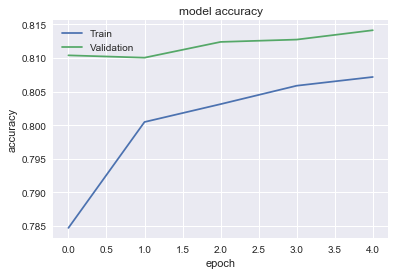

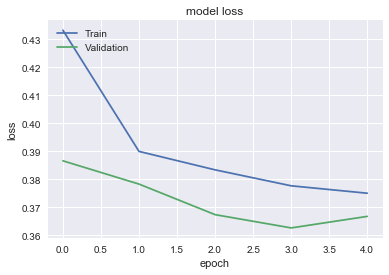

In [54]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Optimzing the the model to get better accuracy
##### All the 3 Machine Learniing models are performing similar on default hyper-parameters , we will tune the hyper-parameters and optimize the the Logistic Regression model to find the model with highest accuracy

##### Optimizing Logisitic Regression


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

parameters = {'C'       : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }


scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train)
best_clf = grid_fit.best_estimator_


In [63]:
best_clf

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Testing

In [64]:
pred = best_clf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  85.84626801063632 %



Confusion Matrix : 
 [[10370  3619]
 [ 7825 59041]]


In [61]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(LogisticRegression(), x_train, y_train, cv=25)
metrics.accuracy_score(y_train, predicted)

0.8097881944444445

# Analysis No :2
## Now lets trying training and testing 2014, 2015, 2016, 2017 data together
#### Here in these analysis the whole data is shuffled and in previous analysi we trained on 2014, 2015, 106 and tested on 2017

#### Here we will divide the whole data : 75% training and 25% testing and it will contain random years

#### This analysis is totaly different from the above one! We will train a new model and test it

In [68]:
final.shape

(368855, 388)

In [69]:
len(y)

368855

In [76]:
X_train, X_test, y_train, y_test = train_test_split(final, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 276641 samples.
Testing set has 92214 samples.


In [77]:
del X_train['Year']

In [78]:
del X_test['Year']

In [84]:
x_test["AmorTerm"] = x_test["AmorTerm"].fillna(360.0)
X_train["AmorTerm"] = X_train["AmorTerm"].fillna(360.0)

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Lets try all the models again on these new split train test data

### Model 1 : Logisitic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
lr_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  83.13813520723534 %



Confusion Matrix : 
 [[35806  3816]
 [11733 40859]]


### Model 2 : Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
rf_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  84.68779144164661 %



Confusion Matrix : 
 [[34995  4627]
 [ 9493 43099]]


### Model 3 : Adaboost 

In [108]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

ab_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  83.55022014010888 %



Confusion Matrix : 
 [[35505  4117]
 [11052 41540]]


### Model 4 : Deep Neural Network

In [110]:
Xtrain = np.array(X_train)
ytrain = np.array(y_train)
Xtest = np.array(X_test)
ytest = np.array(y_test)

classifier = 0
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 32, activation = 'relu', input_dim = 387))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(Xtrain, ytrain, batch_size =64, epochs = 5, validation_split= 0.20)

Train on 221312 samples, validate on 55329 samples
Epoch 1/5
221312/221312 [==============================] - 37s - loss: 0.4161 - acc: 0.7925 - val_loss: 0.4872 - val_acc: 0.7985
Epoch 2/5
221312/221312 [==============================] - 35s - loss: 0.3477 - acc: 0.8216 - val_loss: 0.3477 - val_acc: 0.8204
Epoch 3/5
221312/221312 [==============================] - 35s - loss: 0.3422 - acc: 0.8245 - val_loss: 0.3315 - val_acc: 0.8304
Epoch 4/5
221312/221312 [==============================] - 32s - loss: 0.3402 - acc: 0.8248 - val_loss: 0.3618 - val_acc: 0.7949
Epoch 5/5
221312/221312 [==============================] - 35s - loss: 0.3373 - acc: 0.8269 - val_loss: 0.3576 - val_acc: 0.8151


In [111]:
score = classifier.evaluate(Xtest, ytest, batch_size=32)

91744/92214 [============================>.] - ETA: 0s

In [117]:
nn_acc = score[1]
nn_acc = nn_acc*100
nn_acc

81.19699828607713

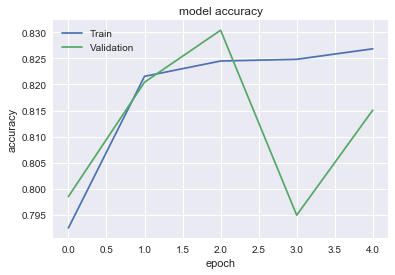

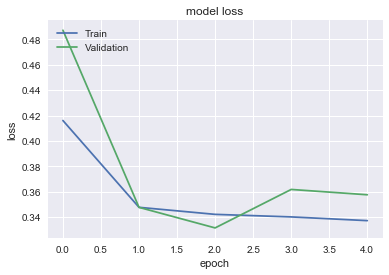

In [113]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Comparing Model Accuracy in Analysis 2

Text(0.5,1,'Model Accuracy Comparison')

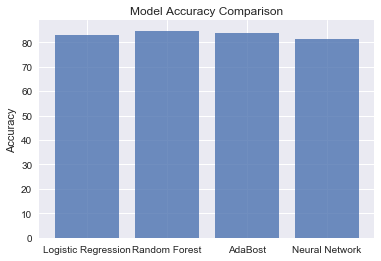

In [119]:
objects = ('Logistic Regression', 'Random Forest', 'AdaBost', 'Neural Network')
y_pos = np.arange(len(objects))
performance = [lr_acc,rf_acc,ab_acc,nn_acc]
 
plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Analysis Number: 3
#### In this analysis we will consider Year column as well (Year = [2014, 2015, 2016]) in the feature set and check how the models are perform if they know the year

In [122]:
final.shape

(368855, 388)

In [123]:
cat = ['Year']
data = final
pre = pd.get_dummies(data, columns=cat, drop_first=True)

In [124]:
pre.shape

(368855, 390)

In [126]:
pre[(pre["Year_2015"] == 0) & (pre["Year_2016"] == 0) & (pre["Year_2017"] == 0)].head()

,Amount,State_Code,Income,Purchaser_Type,GDP,Real_State_Growth_%,Rate,PMT,IncRat,Unemployemnt,...,County_Code_800,County_Code_810,County_Code_820,County_Code_830,County_Code_840,BoCreditScor_4,LTV_1.0,Year_2015,Year_2016,Year_2017
0,0.00051,39,0.008502,0,0.209551,0.666667,1.0,0.000544,0.000252,0.422346,...,0,0,0,0,0,1,0,0,0,0
1,0.00454,48,0.052110,0,0.590777,0.739130,1.0,0.004834,0.000364,0.371161,...,0,0,0,0,0,1,0,0,0,0
2,0.00289,4,0.010602,6,0.093722,0.601449,1.0,0.003077,0.001131,0.495467,...,0,0,0,0,0,1,0,0,0,0
3,0.00113,16,0.008502,3,0.012638,0.644928,1.0,0.001204,0.000553,0.356537,...,0,0,0,0,0,1,0,0,0,0
4,0.00047,39,0.005501,0,0.209551,0.666667,1.0,0.000501,0.000358,0.422346,...,0,0,0,0,0,0,0,0,0,0


In [127]:
pre.shape

(368855, 390)

In [129]:
len(y)

368855

In [132]:
del pre["AmorTerm"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(pre, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 276641 samples.
Testing set has 92214 samples.


### Model 1 : Logisitic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
lr_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  83.22055219381005 %



Confusion Matrix : 
 [[35769  3853]
 [11620 40972]]


### Model 2 : Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
rf_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  84.70622682022253 %



Confusion Matrix : 
 [[35006  4616]
 [ 9487 43105]]


### Model 3 : Adaboost 

In [136]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

ab_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", accuracy_score(y_test, pred)*100,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  83.55022014010888 %



Confusion Matrix : 
 [[35505  4117]
 [11052 41540]]


### Model 4 : Deep Neural Network

In [138]:
Xtrain = np.array(X_train)
ytrain = np.array(y_train)
Xtest = np.array(X_test)
ytest = np.array(y_test)

classifier = 0
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 32, activation = 'relu', input_dim = 389))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(Xtrain, ytrain, batch_size =64, epochs = 5, validation_split= 0.20)

Train on 221312 samples, validate on 55329 samples
Epoch 1/5
221312/221312 [==============================] - 40s - loss: 0.3477 - acc: 0.8234 - val_loss: 0.3224 - val_acc: 0.8355
Epoch 2/5
221312/221312 [==============================] - 41s - loss: 0.3243 - acc: 0.8342 - val_loss: 0.3211 - val_acc: 0.8366
Epoch 3/5
221312/221312 [==============================] - 39s - loss: 0.3175 - acc: 0.8377 - val_loss: 0.3122 - val_acc: 0.8416
Epoch 4/5
221312/221312 [==============================] - 37s - loss: 0.3119 - acc: 0.8408 - val_loss: 0.3077 - val_acc: 0.8440
Epoch 5/5
221312/221312 [==============================] - 37s - loss: 0.3080 - acc: 0.8434 - val_loss: 0.3103 - val_acc: 0.8429


In [141]:
score = classifier.evaluate(Xtest, ytest, batch_size=32)
nn_acc = score[1]
nn_acc = nn_acc*100
nn_acc

91616/92214 [============================>.] - ETA: 0s

84.07183290988695

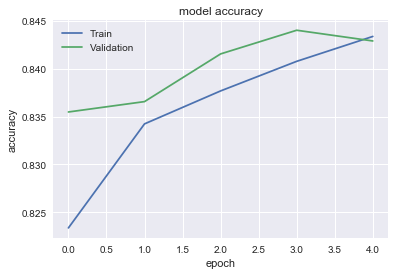

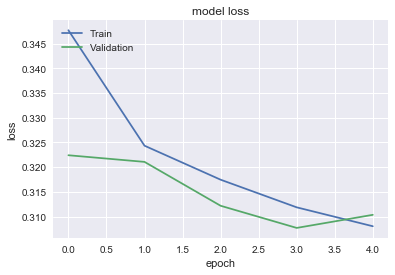

In [142]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Comparing Model Accuracy in Analysis 3

Text(0.5,1,'Model Accuracy Comparison')

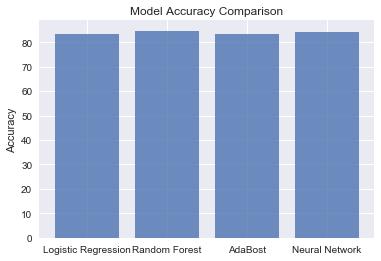

In [143]:
objects = ('Logistic Regression', 'Random Forest', 'AdaBost', 'Neural Network')
y_pos = np.arange(len(objects))
performance = [lr_acc,rf_acc,ab_acc,nn_acc]
 
plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

